# First run

In this first run we will select some variables based on my intuition:


### Exploration

In [115]:
'''import os
os.getcwd()
os.chdir('C:/Anacond')
'''

"import os\nos.getcwd()\nos.chdir('C:/Anacond')\n"

In [116]:
%matplotlib inline

import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style('whitegrid')

data = pd.read_csv('Data Science Bootcamp Data_2.0.csv')
data = data.rename(columns=lambda x: x.strip())   
data.shape

(42653, 152)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42653 entries, 0 to 42652
Columns: 152 entries, Quest No to ChangeReasons
dtypes: float64(89), object(63)
memory usage: 49.5+ MB


In [118]:
recoded_Age = {'Age': {'21-30':25.5, '31-35':33, '36-40':38, '41-60':50.5, 'Above 60':65, 'No Response': None}}
data.replace(recoded_Age, inplace=True)
data.loc[data['Age'] == '18-20', 'Age'] = 19

print(data.Age.value_counts())
data[['Age']].info()

25.5    16503
33.0     9277
38.0     5734
50.5     5010
19.0     4471
65.0     1398
Name: Age, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42653 entries, 0 to 42652
Data columns (total 1 columns):
Age    42393 non-null object
dtypes: object(1)
memory usage: 333.3+ KB


In [119]:
recoded_Gender = {'Gender': {'Male':0, 'Female':1, 'No Response':None}}
data.replace(recoded_Gender, inplace=True)

In [120]:
recoded_Income = {'Income': {'N50,000 - N100,000':75000, 'Below N50,000':25000, 'N101,000 - N250,000':175000,
                             'N251,000 - N500,000':375000, 'N501,000 - N1 Million':750000, 'No Response': None, 'Greater than N1 million':2000000}}
data.replace(recoded_Income, inplace=True)
data.Income.value_counts()

25000.0      19042
75000.0      13415
175000.0      5995
375000.0      1881
750000.0       697
2000000.0      270
Name: Income, dtype: int64

In [121]:
recoded_FreqBra = {'FreqBra': {'Never':0, 'Rarely':0.5, 'Monthly':2, 'At least once a week':6, 
                               'At Least once a day':30, 'No Response': None}}
data.replace(recoded_FreqBra, inplace=True)

recoded_FreqATM = {'FreqATM': {'Never':0, 'Rarely':0.5, 'Monthly':2, 'At least once a week':6, 
                               'At Least once a day':30, 'No Response': None}}
data.replace(recoded_FreqATM, inplace=True)

recoded_FreqPOS = {'FreqPOS': {'Never':0, 'Rarely':0.5, 'Monthly':2, 'At least once a week':6, 
                               'At Least once a day':30, 'No Response': None}}
data.replace(recoded_FreqPOS, inplace=True)

recoded_FreqInt = {'FreqInt': {'Never':0, 'Rarely':0.5, 'Monthly':2, 'At least once a week':6, 
                               'At Least once a day':30, 'No Response': None}}
data.replace(recoded_FreqInt, inplace=True)

recoded_FreqMob = {'FreqMob': {'Never':0, 'Rarely':0.5, 'Monthly':2, 'At least once a week':6, 
                               'At Least once a day':30, 'No Response': None}}
data.replace(recoded_FreqMob, inplace=True)

recoded_FreqUSSD = {'FreqUSSD': {'Never':0, 'Rarely':0.5, 'Monthly':2, 'At least once a week':6, 
                               'At Least once a day':30, 'No Response': None}}
data.replace(recoded_FreqUSSD, inplace=True)

recoded_FreqTel = {'FreqTel': {'Never':0, 'Rarely':0.5, 'Monthly':2, 'At least once a week':6, 
                               'At Least once a day':30, 'No Response': None}}
data.replace(recoded_FreqTel, inplace=True)

We will skip Bank from variables in the clustering analysis. When the analysis is done, we will see the banks that each cluster belongs to

We will also skip Devices used in mobile banking in this first run

In [122]:
selected_data = data[['Age', 'Gender', 'Income', 'No of Years', 'FreqBra', 'FreqATM', 'FreqPOS', 'FreqInt', 
                      'FreqMob', 'FreqUSSD', 'FreqTel']]

In [123]:
demographic = data.iloc[:,:10]
banking_rel_reasons = data.iloc[:,10:16]
bank_chann_usage = data.iloc[:,16:23]
most_freq_ATM = data.iloc[:,23:24]
reas_for_freq_ATM = data.iloc[:,24:28]
dev_used_onl_banking = data.iloc[:,28:32]
bank_activ_engaged = data.iloc[:,32:41]
bank_activ_will_like = data.iloc[:,41:50]

# Customer Experience
cust_care = data.iloc[:,50:58]
complaints = data.iloc[:,58:62]
branches = data.iloc[:,62:74]
ATMs = data.iloc[:,74:82]
mob_banking = data.iloc[:,82:94]
int_banking = data.iloc[:,94:106]
call_centre = data.iloc[:,106:112]
soc_media = data.iloc[:,112:116]
cards = data.iloc[:,116:124]
exec_eff = data.iloc[:,124:128]
prod = data.iloc[:,128:132]
ease_credit = data.iloc[:, 132:136]
val_for_money = data.iloc[:,136:138]

# Payments
pay_settl_wit_cash = data.iloc[:,138:141]
pay_settl_wo_cash = data.iloc[:,141:144]
pay_will_like_cashless = data.iloc[:,144:147]

#Loyalty
bank_recommendation = data.iloc[:,147:148]
bank_switch_plan = data.iloc[:,148:149]
from_bank = data.iloc[:,149:150]
to_bank = data.iloc[:,150:151]
reason_for_switch = data.iloc[:,151:152]

In [124]:
null_rows = reas_for_freq_ATM.index[reas_for_freq_ATM.isnull().all(1)]
null_rows

Int64Index([    2,     3,     5,    12,    15,    16,    18,    19,    32,
               33,
            ...
            42599, 42600, 42601, 42611, 42612, 42613, 42614, 42615, 42617,
            42618],
           dtype='int64', length=6849)

Decision to discard this reasons for freq ATM due to judgement of analyst

In [125]:
null_rows = dev_used_onl_banking.index[dev_used_onl_banking.isnull().all(1)]
null_rows

Int64Index([    0,     1,     2,     3,     5,    12,    18,    19,    28,
               32,
            ...
            42618, 42630, 42635, 42636, 42637, 42638, 42644, 42645, 42646,
            42647],
           dtype='int64', length=20914)

In [126]:
dev_used_onl_banking.describe()
dev_per_person = np.sum(dev_used_onl_banking =='Yes', axis=1)
dev_per_person.describe()

count    42653.000000
mean         0.517431
std          0.517496
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
dtype: float64

(array([ 20914.,      0.,  21454.,      0.,      0.,    248.,      0.,
            28.,      0.,      9.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

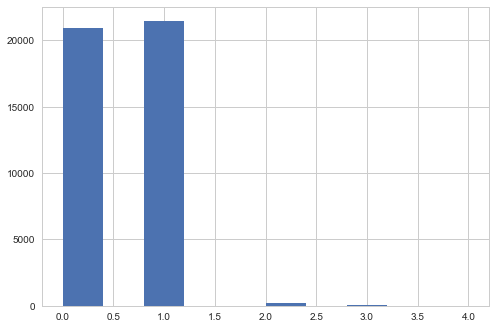

In [127]:
plt.hist(dev_per_person)

There are a lot of nulls for devices used in online banking, but it is a safe assumption that blanks mean that no device is used for online banking given the poor distribution of literacy in Nigeria

bank_activ_engaged will be ignored for now. Each of the columns represent an activity and the value in each role is the primary channel used to execute such activity. Initial idea was to get some count of the channel usage and use that rather than the activity itself, but this is already mostly covered by bank_chann_usage. It might be interesting to see which activities are carried out be each cluster. 

bank_activ_will_like too will be ignored for now. It might be interesting still to see the activites the various clusters will like

#### Customer  Experience (Customer Care, Complaints, Branches, etc)

We will shift the data (all ratings by -4 so that neutral is zero)

We will multiply the importance by the rating for each criteron and get a single score for each subsection

In [128]:
cust_care.columns

Index(['impcc1a', 'cc1a', 'impcc1b', 'cc1b', 'impcc2', 'cc2', 'impcc3', 'cc3'], dtype='object')

In [129]:
cust_care.iloc[:,1::2] -=  4
cust_care_score = np.sum(cust_care.iloc[:,0::2].values * cust_care.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['cust_care_score'] = cust_care_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [130]:
complaints.iloc[:,1::2] -=  4
complaints_score = np.sum(complaints.iloc[:,0::2].values * complaints.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['complaints_score'] = complaints_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [131]:
branches.iloc[:,1::2] -=  4
branches_score = np.sum(branches.iloc[:,0::2].values * branches.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['branches_score'] = branches_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [132]:
ATMs.iloc[:,1::2] -=  4
ATMs_score = np.sum(ATMs.iloc[:,0::2].values * ATMs.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['ATMs_score'] = ATMs_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [133]:
mob_banking.iloc[:,1::2] -=  4
mob_banking_score = np.sum(mob_banking.iloc[:,0::2].values * mob_banking.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['mob_banking_score'] = mob_banking_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [134]:
int_banking.iloc[:,1::2] -=  4
int_banking_score = np.sum(int_banking.iloc[:,0::2].values * int_banking.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['int_banking_score'] = int_banking_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [135]:
call_centre.iloc[:,1::2] -=  4
call_centre_score = np.sum(call_centre.iloc[:,0::2].values * call_centre.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['call_centre_score'] = call_centre_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [136]:
soc_media.iloc[:,1::2] -=  4
soc_media_score = np.sum(soc_media.iloc[:,0::2].values * soc_media.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['soc_media_score'] = soc_media_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [137]:
exec_eff.iloc[:,1::2] -=  4
exec_eff_score = np.sum(exec_eff.iloc[:,0::2].values * exec_eff.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['exec_eff_score'] = exec_eff_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [138]:
prod.iloc[:,1::2] -=  4
prod_score = np.sum(prod.iloc[:,0::2].values * prod.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['prod_score'] = prod_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [139]:
ease_credit.iloc[:,1::2] -=  4
ease_credit_score = np.sum(ease_credit.iloc[:,0::2].values * ease_credit.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['ease_credit_score'] = ease_credit_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [140]:
val_for_money.iloc[:,1::2] -=  4
val_for_money_score = np.sum(val_for_money.iloc[:,0::2].values * val_for_money.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['val_for_money_score'] = val_for_money_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [142]:
selected_data.iloc[:,:12].describe()

,Gender,Income,No of Years,FreqBra,FreqATM,FreqPOS,FreqInt,FreqMob,FreqUSSD,FreqTel,cust_care_score
count,40563.000000,4.130000e+04,41386.000000,39959.000000,41920.000000,38561.000000,38777.000000,39087.000000,38074.000000,37902.000000,36376.000000
mean,0.463674,1.041023e+05,6.113227,3.919530,8.071601,2.237222,3.031784,4.146340,3.417398,0.674872,37.379783
std,0.498685,1.943508e+05,4.801078,6.208846,8.936301,5.406533,7.305842,8.445696,8.012664,3.215450,34.889540
min,0.000000,2.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-120.000000
25%,0.000000,2.500000e+04,3.000000,0.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,7.500000e+04,5.000000,2.000000,6.000000,0.500000,0.000000,0.500000,0.000000,0.000000,36.000000
75%,1.000000,7.500000e+04,8.000000,6.000000,6.000000,2.000000,2.000000,6.000000,2.000000,0.500000,59.000000
max,1.000000,2.000000e+06,55.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,120.000000


In [144]:
selected_data.iloc[:,12:].describe()

,complaints_score,branches_score,ATMs_score,mob_banking_score,int_banking_score,call_centre_score,soc_media_score,exec_eff_score,prod_score,ease_credit_score,val_for_money_score
count,38715.000000,36379.000000,37488.000000,18273.000000,15255.000000,12197.000000,16054.000000,36873.000000,33922.000000,16312.000000,34050.000000
mean,18.487460,47.700844,41.328612,57.427078,53.598558,21.823071,14.457830,22.800586,16.738488,13.658718,8.499912
std,20.967451,49.480791,38.653564,53.043930,53.399985,27.993780,18.809495,20.036471,20.210425,20.573956,12.549324
min,-60.000000,-180.000000,-120.000000,-180.000000,-180.000000,-90.000000,-60.000000,-60.000000,-60.000000,-60.000000,-30.000000
25%,7.000000,18.000000,19.000000,23.000000,17.000000,0.000000,0.000000,11.000000,5.000000,0.000000,0.000000
50%,19.000000,46.000000,40.000000,54.000000,50.000000,20.000000,12.000000,20.000000,17.000000,12.000000,10.000000
75%,32.000000,78.000000,69.000000,90.000000,88.000000,39.000000,26.000000,36.000000,30.000000,27.000000,18.000000
max,60.000000,180.000000,120.000000,180.000000,180.000000,90.000000,60.000000,60.000000,70.000000,81.000000,30.000000


In [145]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(selected_data)
X = imputer.transform(selected_data)
selected_data = pd.DataFrame(X, columns=selected_data.columns)

In [146]:
selected_data.describe()

,Age,Gender,Income,No of Years,FreqBra,FreqATM,FreqPOS,FreqInt,FreqMob,FreqUSSD,...,branches_score,ATMs_score,mob_banking_score,int_banking_score,call_centre_score,soc_media_score,exec_eff_score,prod_score,ease_credit_score,val_for_money_score
count,42653.000000,42653.000000,4.265300e+04,42653.000000,42653.000000,42653.000000,42653.000000,42653.000000,42653.000000,42653.000000,...,42653.00000,42653.000000,42653.000000,42653.000000,42653.000000,42653.000000,42653.000000,42653.000000,42653.000000,42653.000000
mean,32.407181,0.440954,1.031791e+05,6.080158,3.798291,8.036000,2.070558,2.756277,3.841488,3.050524,...,47.45066,41.167726,55.468197,51.287037,20.521323,12.925093,22.421072,16.792019,12.634352,8.802476
std,10.717085,0.496507,1.913114e+05,4.733007,6.027678,8.863271,5.166043,7.020273,8.147687,7.643909,...,45.70083,36.240256,34.759743,31.981281,14.991918,11.600738,18.654088,18.023848,12.748479,11.228655
min,19.000000,0.000000,2.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-180.00000,-120.000000,-180.000000,-180.000000,-90.000000,-60.000000,-60.000000,-60.000000,-60.000000,-30.000000
25%,25.500000,0.000000,2.500000e+04,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,23.00000,20.000000,54.000000,50.000000,20.000000,12.000000,14.000000,9.000000,12.000000,3.000000
50%,33.000000,0.000000,7.500000e+04,5.000000,2.000000,6.000000,0.500000,0.000000,0.500000,0.000000,...,46.00000,40.000000,54.000000,50.000000,20.000000,12.000000,20.000000,17.000000,12.000000,10.000000
75%,38.000000,1.000000,7.500000e+04,8.000000,6.000000,6.000000,2.000000,2.000000,2.000000,2.000000,...,70.00000,61.000000,54.000000,50.000000,20.000000,12.000000,32.000000,24.000000,12.000000,12.000000
max,65.000000,1.000000,2.000000e+06,55.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,180.00000,120.000000,180.000000,180.000000,90.000000,60.000000,60.000000,70.000000,81.000000,30.000000


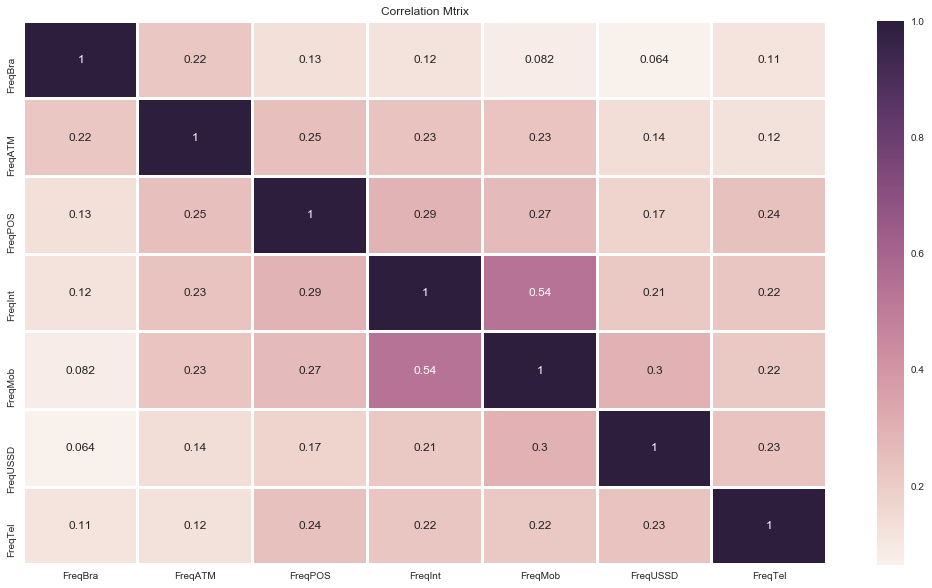

In [147]:
corr_matrix = bank_chann_usage.corr()

f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr_matrix,linewidths=2.0, ax=ax , annot=True)
ax.set_title('Correlation Mtrix')

## Clustering and PCA

In [148]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(selected_data)

selected_data_std = std_scaler.transform(selected_data)
selected_data_std_df = pd.DataFrame(selected_data_std, columns = selected_data.columns)

(array([  5601.,   6302.,      0.,   4345.,      0.,  12136.,   3071.,
             0.,  10781.,    417.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

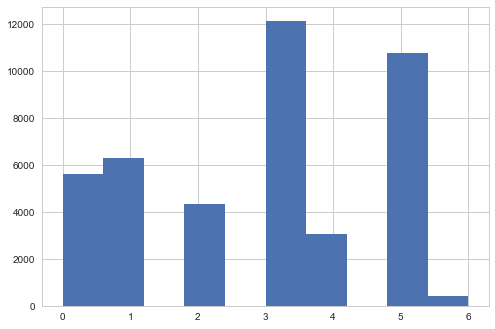

In [149]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=0).fit(selected_data_std)

import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(kmeans.labels_)

In [150]:
cluster_df_std = pd.DataFrame(kmeans.cluster_centers_, columns=selected_data.columns)
cluster_df_std

,Age,Gender,Income,No of Years,FreqBra,FreqATM,FreqPOS,FreqInt,FreqMob,FreqUSSD,...,branches_score,ATMs_score,mob_banking_score,int_banking_score,call_centre_score,soc_media_score,exec_eff_score,prod_score,ease_credit_score,val_for_money_score
0,-0.019457,-0.016667,0.019949,-0.045290,0.096996,0.089393,0.092566,-0.029078,0.044013,0.059153,...,1.271418,1.145473,1.068305,1.019898,0.884268,0.965905,1.046259,1.145863,1.009385,0.961807
1,-0.170489,-0.004439,-0.124798,-0.135118,-0.024031,0.016214,-0.046509,-0.104406,-0.099902,-0.093051,...,-1.051103,-0.991469,-0.783812,-0.758460,-0.657533,-0.682574,-1.033413,-1.086907,-0.753693,-1.058648
2,1.829517,-0.151089,1.001111,1.676988,0.150093,-0.187817,-0.075673,-0.243553,-0.269122,-0.159038,...,0.030981,0.034784,-0.060514,-0.036631,0.001088,-0.033460,0.088616,0.089432,0.013860,0.146373
3,-0.239933,-0.888122,-0.181148,-0.250878,-0.083688,-0.093058,-0.154201,-0.271741,-0.257557,-0.108046,...,-0.002179,0.015599,-0.023442,-0.037786,-0.016176,-0.035156,0.030064,0.022250,-0.039671,0.042804
4,-0.100115,-0.175221,0.258654,-0.062619,0.337233,0.849136,0.907725,2.461499,2.261529,0.778146,...,-0.128276,-0.198433,-0.002837,0.071156,-0.102020,-0.022567,-0.131011,-0.111693,-0.121177,-0.168908
5,-0.329920,1.125971,-0.222799,-0.271121,-0.129408,-0.152094,-0.143617,-0.284938,-0.270843,-0.086499,...,-0.020915,0.010542,-0.043157,-0.047605,-0.034100,-0.049129,0.032597,0.014709,-0.016210,0.061629
6,0.025220,-0.105668,0.314623,-0.050884,0.794551,0.898685,1.764484,1.654232,1.566454,1.919368,...,0.036841,-0.026730,-0.051553,-0.045868,0.154459,0.152402,-0.109092,-0.099160,0.156785,-0.037723


In [151]:
cluster_df = pd.DataFrame(std_scaler.inverse_transform(kmeans.cluster_centers_), columns=selected_data.columns)
cluster_df

,Age,Gender,Income,No of Years,FreqBra,FreqATM,FreqPOS,FreqInt,FreqMob,FreqUSSD,...,branches_score,ATMs_score,mob_banking_score,int_banking_score,call_centre_score,soc_media_score,exec_eff_score,prod_score,ease_credit_score,val_for_money_score
0,32.198661,4.326786e-01,106995.535714,5.865804,4.382946,8.828304,2.548750,2.552143,4.200089,3.502679,...,105.554821,82.679464,92.601786,83.904286,33.778036,24.130179,41.937857,37.444643,25.502321,19.602143
1,30.580054,4.387496e-01,79304.189146,5.440654,3.653443,8.179705,1.830292,2.023326,3.027531,2.339257,...,-0.585052,5.237068,28.223421,27.030784,10.663758,5.006823,3.143923,-2.798001,3.026023,-3.084576
2,52.014039,3.659379e-01,294700.805524,14.017261,4.702992,6.371346,1.679632,1.046490,1.648792,1.834868,...,48.866513,42.428308,53.364787,50.115535,20.537629,12.536939,24.074108,18.403913,12.811047,10.446030
3,29.835833,8.421042e-14,68523.935075,4.892766,3.293854,7.211214,1.273956,0.848603,1.743017,2.224644,...,47.351075,41.733048,54.653374,50.078603,20.278817,12.517261,22.981874,17.193046,12.128615,9.283101
4,31.334256,3.539564e-01,152661.999349,5.783784,5.831000,15.562032,6.759850,20.036470,22.267502,8.998535,...,41.588408,33.976555,55.369586,53.562683,18.991859,12.663302,19.977206,14.778899,11.089547,6.905894
5,28.871440,1.000000e+00,60555.607087,4.796958,3.018273,6.687970,1.328634,0.755960,1.634774,2.389342,...,46.494852,41.549763,53.968092,49.764586,20.010110,12.355162,23.029125,17.057138,12.427697,9.494481
6,32.677458,3.884892e-01,163369.304556,5.839329,8.587530,16.001199,11.185851,14.369305,16.604317,17.721823,...,49.134293,40.199041,53.676259,49.820144,22.836930,14.693046,20.386091,15.004796,14.633094,8.378897


In [152]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pca.fit(selected_data_std)
pca.components_
X = pd.DataFrame(pca.components_, columns = selected_data.columns)
X.head()

,Age,Gender,Income,No of Years,FreqBra,FreqATM,FreqPOS,FreqInt,FreqMob,FreqUSSD,...,branches_score,ATMs_score,mob_banking_score,int_banking_score,call_centre_score,soc_media_score,exec_eff_score,prod_score,ease_credit_score,val_for_money_score
0,-0.041514,0.005392,-0.034641,-0.026634,-0.018544,-0.006819,-0.022874,-0.006948,-0.017918,-0.023188,...,-0.325727,-0.301976,-0.280920,-0.271614,-0.238383,-0.248547,-0.296488,-0.314272,-0.258320,-0.278924
1,0.032578,-0.088832,0.196073,0.029998,0.211655,0.331203,0.379625,0.462958,0.463036,0.317535,...,-0.027150,-0.040065,0.034302,0.041402,0.040301,0.054030,-0.055390,-0.051629,-0.012322,-0.073289
2,0.642641,-0.137134,0.404094,0.594661,0.098456,-0.058647,-0.011375,-0.072804,-0.103319,-0.090112,...,-0.021500,-0.023530,-0.065704,-0.058429,-0.021364,-0.039476,-0.004835,-0.003994,-0.021848,0.005084
3,-0.049864,0.047360,0.028376,-0.100091,0.178970,0.158783,0.096736,-0.019217,-0.056332,0.008594,...,0.144289,0.104398,-0.444598,-0.489170,-0.316422,-0.301894,0.220861,0.251875,0.046050,0.296122
4,-0.067109,-0.345709,0.037826,-0.145881,0.405483,0.365114,0.007926,-0.107673,-0.151617,-0.218282,...,0.186859,0.202552,0.149480,0.125723,-0.106388,-0.131291,-0.134919,-0.188725,-0.323015,-0.242020


In [153]:
pca.explained_variance_ratio_

array([ 0.2154806 ,  0.09725285,  0.07545103,  0.05162445,  0.0466027 ,
        0.04595785,  0.04246887,  0.0402036 ,  0.0373673 ,  0.03597965,
        0.03521353])

In [154]:
selected_data_std_pca = pca.transform(selected_data_std)
selected_data_std_pca = pd.DataFrame(selected_data_std_pca, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11'])
selected_data_std_pca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11
0,0.685452,-0.934512,0.982842,-0.613727,-0.337742,0.127264,-0.832581,0.388927,-0.175900,0.020366,-0.448181
1,0.137457,-1.039384,0.209881,-0.214288,0.063710,0.263108,-0.866954,0.435311,-0.224620,0.153892,-0.052165
2,-0.416968,0.095574,-0.744596,0.241983,-0.661742,1.030644,-0.671261,2.130306,1.257122,-1.019028,1.404983
3,1.901729,0.380967,-0.332108,-1.039078,-1.408181,0.091953,-0.827371,2.096093,1.591234,-1.006660,1.243568
4,3.463338,-0.687081,-0.214154,0.483685,0.268343,-0.100400,-0.757544,0.598487,-0.944446,-0.475255,0.014457


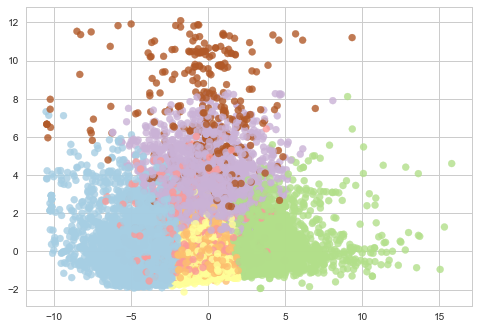

In [155]:
plt.scatter(selected_data_std_pca['pca1'], selected_data_std_pca['pca2'], c=kmeans.labels_, cmap='Paired', alpha=0.8)
#plt.legend(['1', '2', '3', '4', '5', '6'])

PCA not really working for separating the clusters

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\matplotlib\collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


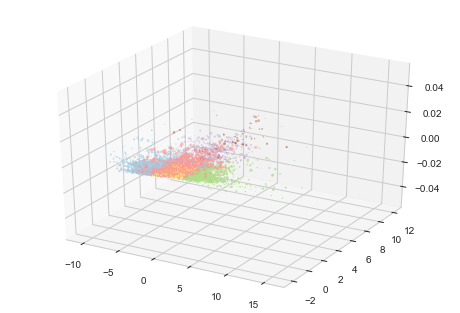

In [156]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(selected_data_std_pca['pca1'], selected_data_std_pca['pca2'], selected_data_std_pca['pca3'], c=kmeans.labels_, cmap='Paired')

## t-SNE

In [72]:
np.random.seed(9)
selected_data_std_rd = np.random.permutation(selected_data_std)

In [73]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, n_iter=300)
tsne_result = tsne.fit_transform(selected_data_std_rd[:5000])

time_elapsed = time.time() - time_start
time_elapsed


99.65059614181519

In [74]:
tsne_result.shape

(5000, 2)

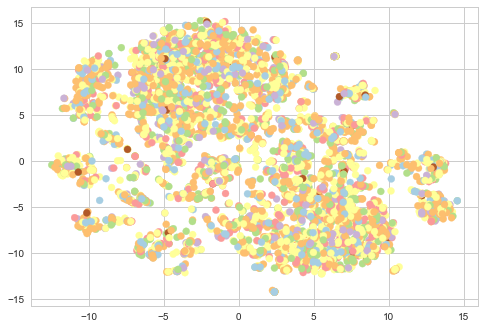

In [75]:
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=kmeans.labels_[:5000], cmap='Paired')